In [1]:
import pandas as pd
import numpy as np

importaciones = pd.read_excel("Estadisticas.xlsx", sheet_name="IMPORTACION")

In [2]:
importaciones = importaciones[["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]]

# Analisis serie temporal - Importaciones 

In [3]:
importaciones["Fecha"] = pd.to_datetime(importaciones["Fecha"])
importaciones.set_index("Fecha", inplace=True)
importaciones

,Gasolina regular,Gasolina superior,Diesel alto azufre
Fecha,,,
2001-01-01,177776.50,373963.96,566101.99
2001-02-01,123115.99,243091.07,489525.80
2001-03-01,161726.42,312084.38,575559.68
2001-04-01,127338.74,285054.89,437745.42
2001-05-01,168730.19,300913.67,552609.13
...,...,...,...
2024-08-01,827107.06,679009.42,0.00
2024-09-01,1141365.94,822168.56,0.00
2024-10-01,790347.12,782139.65,0.00


In [4]:
regular_ts = importaciones["Gasolina regular"]
superior_ts = importaciones["Gasolina superior"]
diesel_ts = importaciones["Diesel alto azufre"]

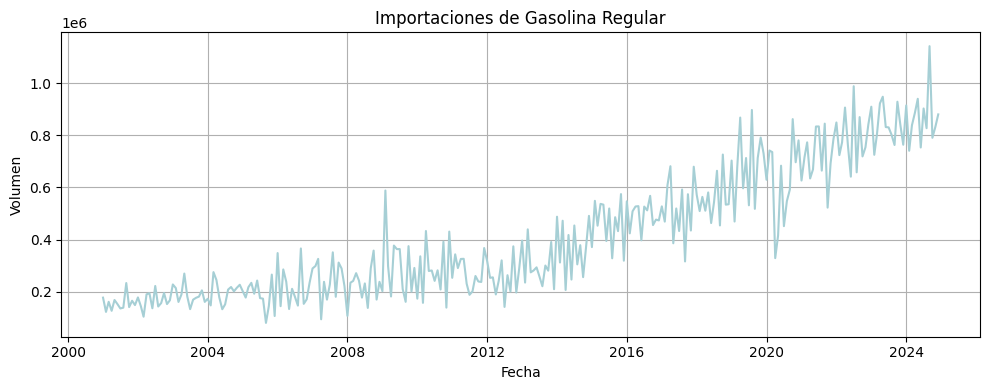

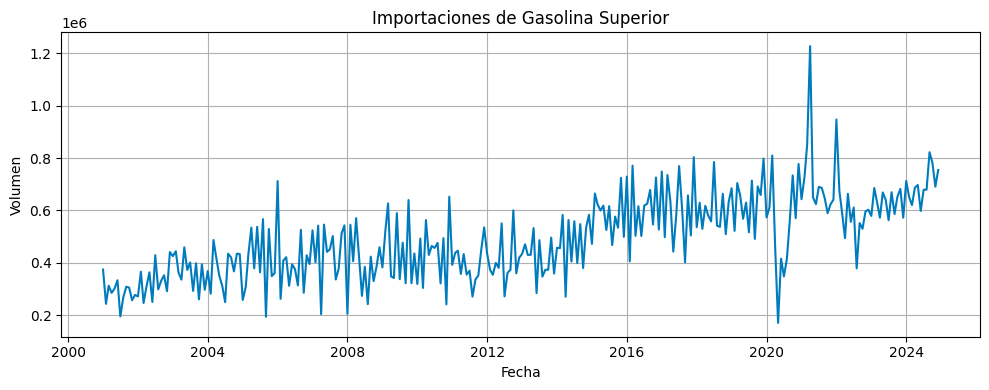

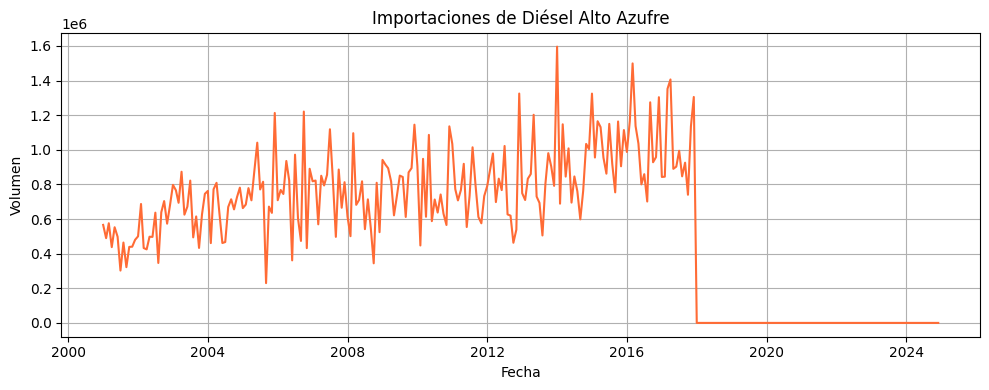

In [5]:
import matplotlib.pyplot as plt

# Gasolina regular
plt.figure(figsize=(10, 4))
plt.plot(regular_ts, color='#A6CFD5')
plt.title("Importaciones de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gasolina superior
plt.figure(figsize=(10, 4))
plt.plot(superior_ts, color='#007CBE')
plt.title("Importaciones de Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()

# Diésel alto azufre
plt.figure(figsize=(10, 4))
plt.plot(diesel_ts, color='#FF6B35')
plt.title("Importaciones de Diésel Alto Azufre")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()


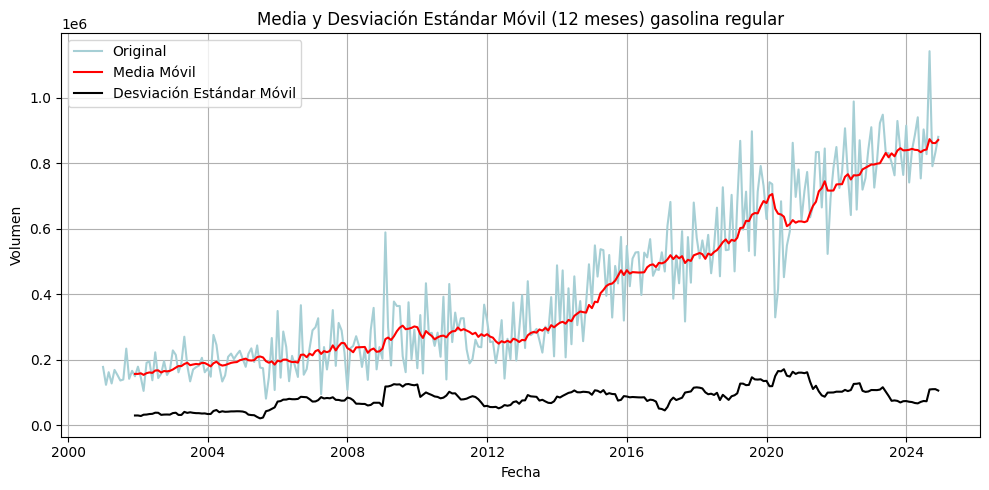

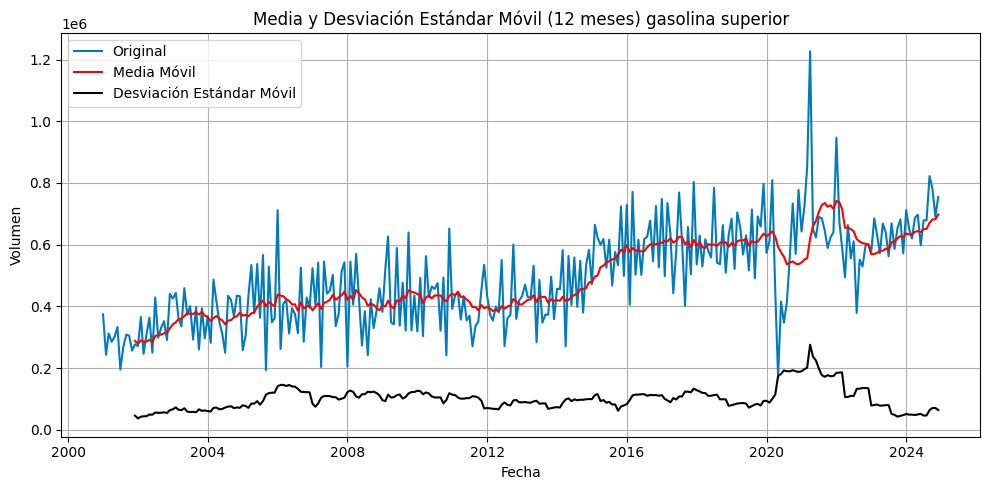

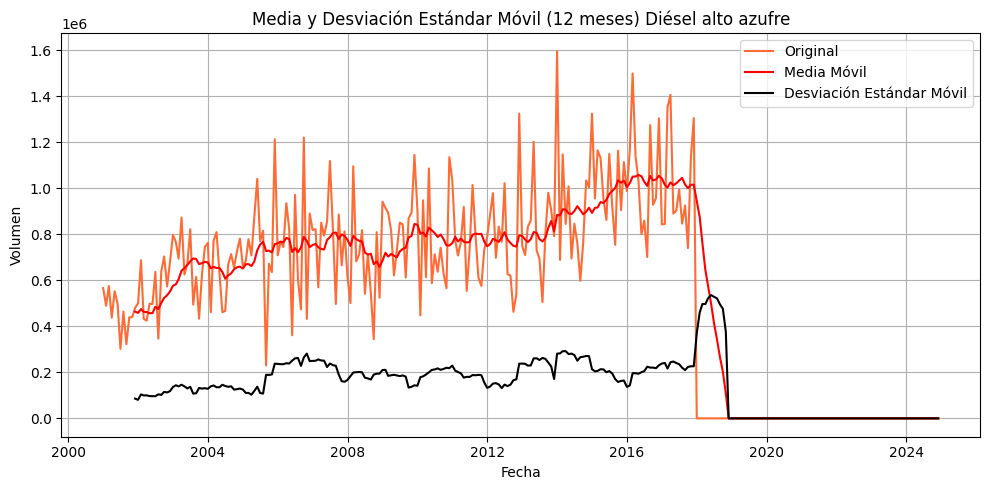

In [6]:
media_movil_regular = regular_ts.rolling(window=12).mean()
desv_movil_regular = regular_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(regular_ts, color="#A6CFD5", label="Original")
plt.plot(media_movil_regular, color='red', label='Media Móvil')
plt.plot(desv_movil_regular, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Media y Desviación Estándar Móvil (12 meses) gasolina regular")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------
media_movil_superior = superior_ts.rolling(window=12).mean()
desv_movil_superior = superior_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(superior_ts, color="#007CBE", label="Original")
plt.plot(media_movil_superior, color='red', label='Media Móvil')
plt.plot(desv_movil_superior, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Media y Desviación Estándar Móvil (12 meses) gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------
media_movil_diesel = diesel_ts.rolling(window=12).mean()
desv_movil_diesel = diesel_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(diesel_ts, color="#FF6B35", label="Original")
plt.plot(media_movil_diesel, color='red', label='Media Móvil')
plt.plot(desv_movil_diesel, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Media y Desviación Estándar Móvil (12 meses) Diésel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()


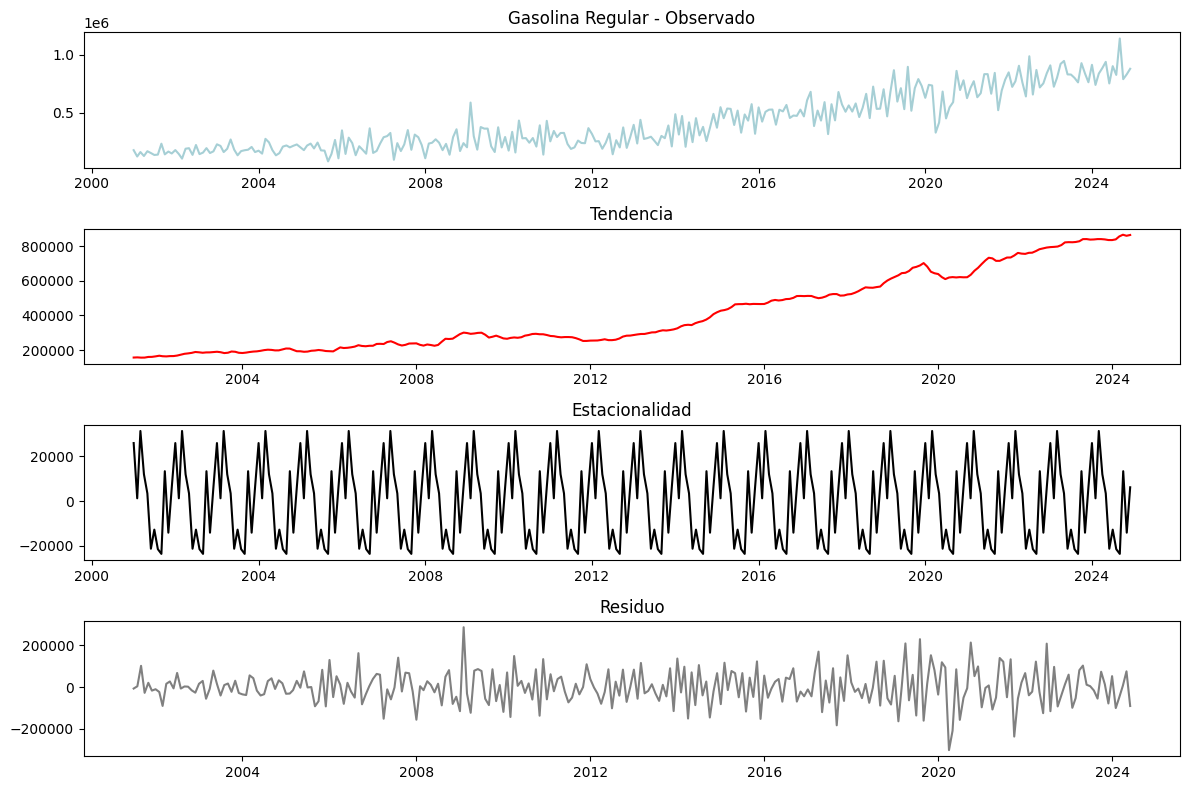

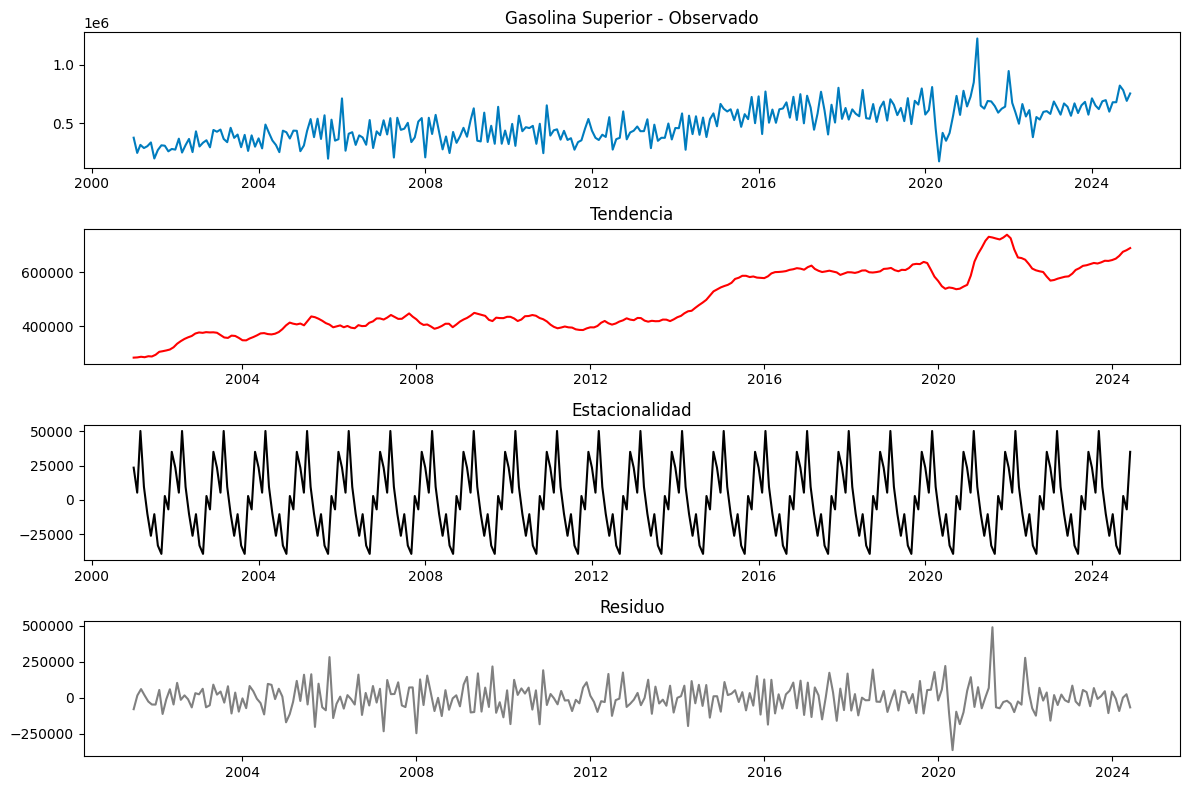

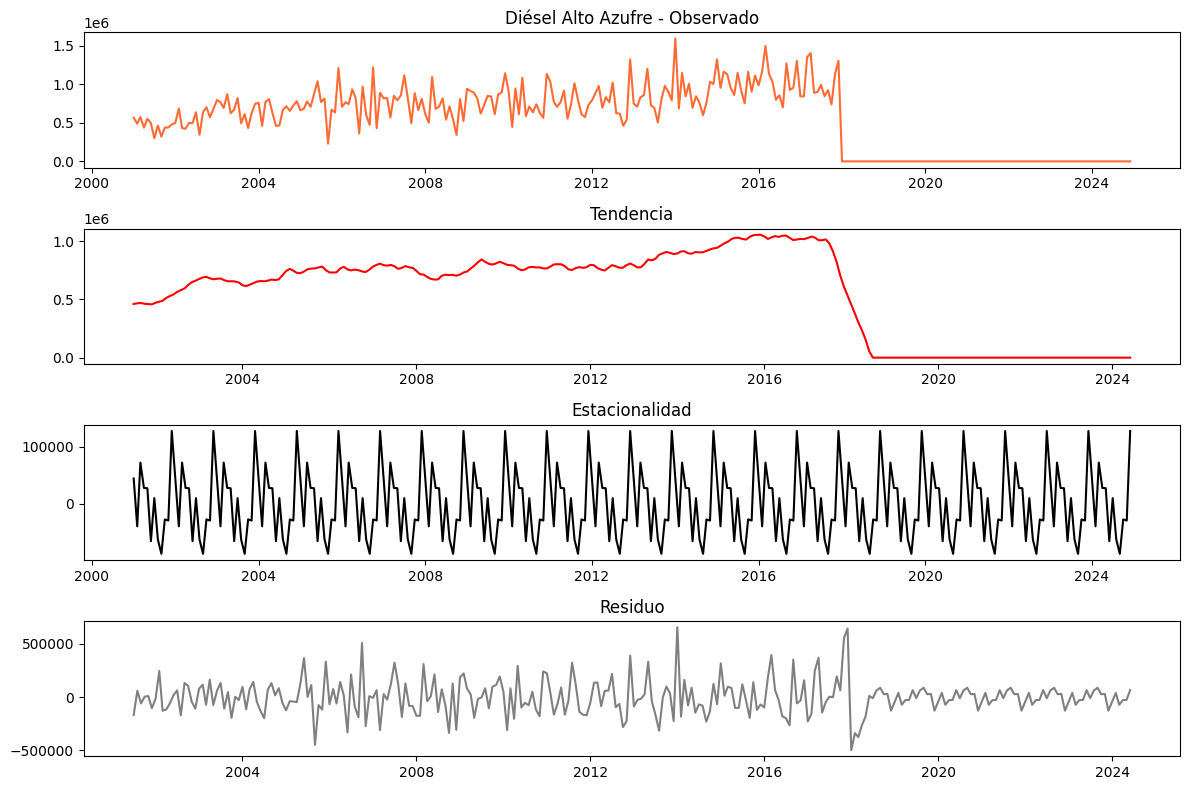

In [7]:
"""
Se descompoen las series en componentes de tendencia, estacionalidad y ruido.
"""

from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición aditiva
decomp_regular = seasonal_decompose(regular_ts, model='additive', period=12)

# Graficar resultados
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomp_regular.observed, color="#A6CFD5", label='Original')
plt.title('Gasolina Regular - Observado')

plt.subplot(412)
plt.plot(decomp_regular.trend, color='red', label='Tendencia')
plt.title('Tendencia')

plt.subplot(413)
plt.plot(decomp_regular.seasonal, color='black', label='Estacionalidad')
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(decomp_regular.resid, color='gray', label='Residuo')
plt.title('Residuo')

plt.tight_layout()
plt.show()
#---------------------------------------------------------------------------------
decomp_superior = seasonal_decompose(superior_ts, model='additive', period=12)

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomp_superior.observed, color="#007CBE")
plt.title('Gasolina Superior - Observado')

plt.subplot(412)
plt.plot(decomp_superior.trend, color='red')
plt.title('Tendencia')

plt.subplot(413)
plt.plot(decomp_superior.seasonal, color='black')
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(decomp_superior.resid, color='gray')
plt.title('Residuo')

plt.tight_layout()
plt.show()
#---------------------------------------------------------------------------------
decomp_diesel = seasonal_decompose(diesel_ts, model='additive', period=12)

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomp_diesel.observed, color="#FF6B35")
plt.title('Diésel Alto Azufre - Observado')

plt.subplot(412)
plt.plot(decomp_diesel.trend, color='red')
plt.title('Tendencia')

plt.subplot(413)
plt.plot(decomp_diesel.seasonal, color='black')
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(decomp_diesel.resid, color='gray')
plt.title('Residuo')

plt.tight_layout()
plt.show()




In [8]:
regular_ts = np.log(regular_ts)
superior_ts = np.log(superior_ts)
diesel_ts = diesel_ts["2001-01":"2016-12"] #porque en las graficas se notaba que los datos caian a cero
diesel_ts = np.log(diesel_ts)

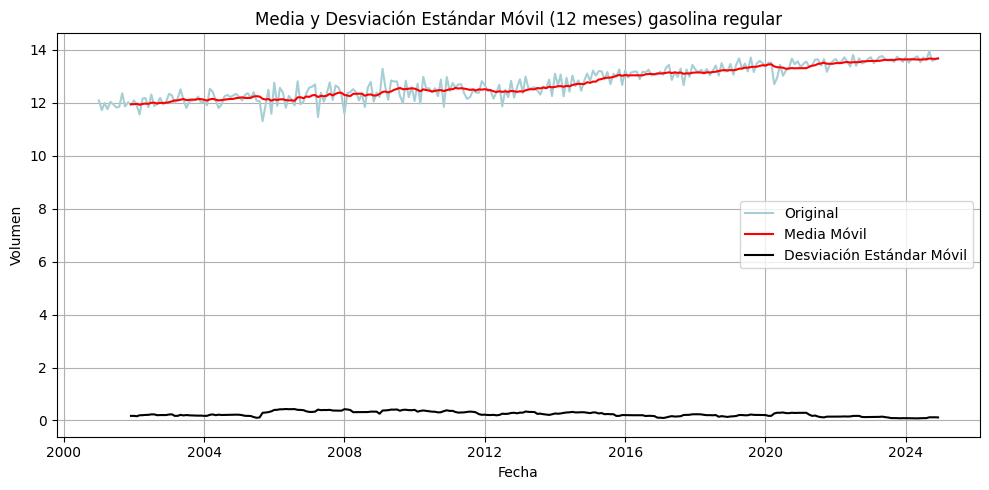

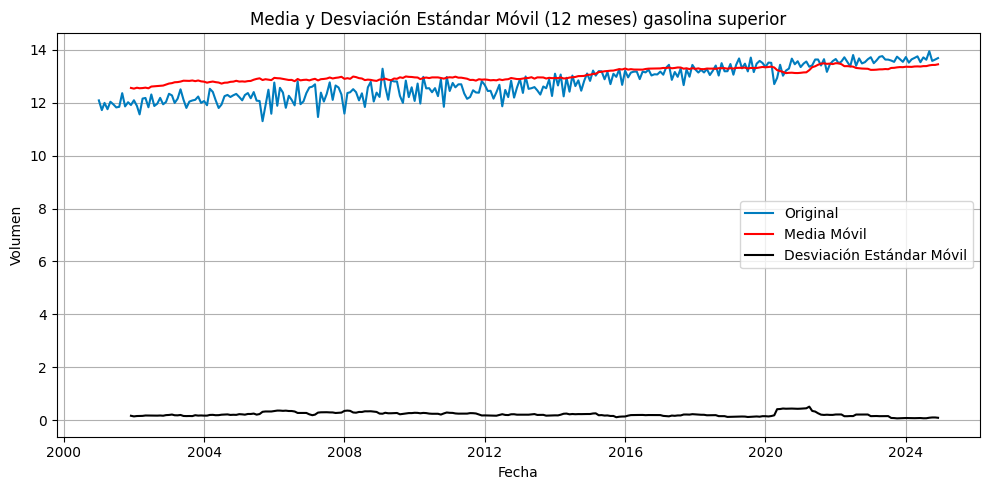

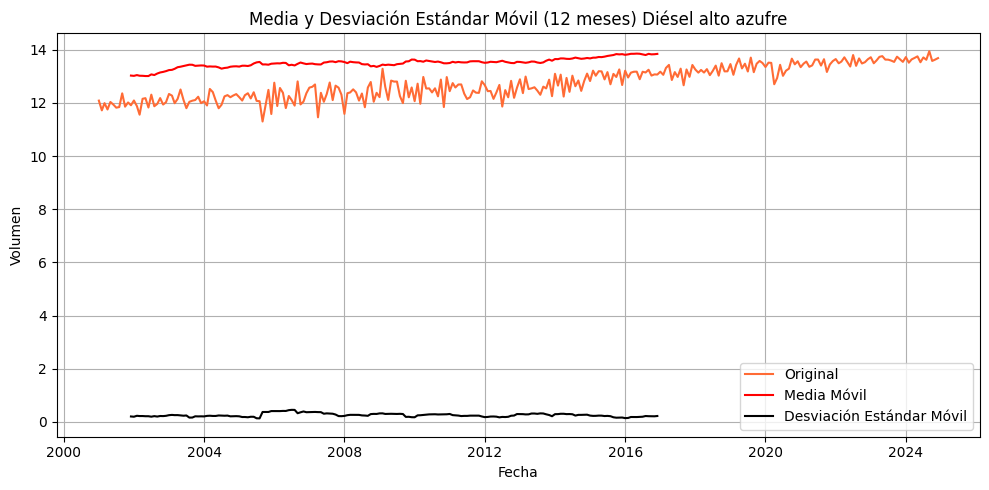

In [9]:
media_movil_regular = regular_ts.rolling(window=12).mean()
desv_movil_regular = regular_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(regular_ts, color="#A6CFD5", label="Original")
plt.plot(media_movil_regular, color='red', label='Media Móvil')
plt.plot(desv_movil_regular, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Media y Desviación Estándar Móvil (12 meses) gasolina regular")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------
media_movil_superior = superior_ts.rolling(window=12).mean()
desv_movil_superior = superior_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(regular_ts, color="#007CBE", label="Original")
plt.plot(media_movil_superior, color='red', label='Media Móvil')
plt.plot(desv_movil_superior, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Media y Desviación Estándar Móvil (12 meses) gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------
media_movil_diesel = diesel_ts.rolling(window=12).mean()
desv_movil_diesel = diesel_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(regular_ts, color="#FF6B35", label="Original")
plt.plot(media_movil_diesel, color='red', label='Media Móvil')
plt.plot(desv_movil_diesel, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Media y Desviación Estándar Móvil (12 meses) Diésel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
#aqui vamos a verificar numericamente si la varianza ya es estacionaria: 

n = len(regular_ts)
std_primera_mitad = regular_ts[:n//2].std()
std_segunda_mitad = regular_ts[n//2:].std()

print("STD primera mitad:", std_primera_mitad)
print("STD segunda mitad:", std_segunda_mitad)
print("Relación:", std_segunda_mitad / std_primera_mitad)
print("-"*50)

n = len(superior_ts)
std_primera_mitad = superior_ts[:n//2].std()
std_segunda_mitad = superior_ts[n//2:].std()

print("STD primera mitad:", std_primera_mitad)
print("STD segunda mitad:", std_segunda_mitad)
print("Relación:", std_segunda_mitad / std_primera_mitad)
print("-"*50)

n = len(diesel_ts)
std_primera_mitad = diesel_ts[:n//2].std()
std_segunda_mitad = diesel_ts[n//2:].std()

print("STD primera mitad:", std_primera_mitad)
print("STD segunda mitad:", std_segunda_mitad)
print("Relación:", std_segunda_mitad / std_primera_mitad)



STD primera mitad: 0.3438374456632432
STD segunda mitad: 0.37568338992928735
Relación: 1.0926191858033818
--------------------------------------------------
STD primera mitad: 0.2630645674814229
STD segunda mitad: 0.24956663469928034
Relación: 0.9486896585451565
--------------------------------------------------
STD primera mitad: 0.31040085645976284
STD segunda mitad: 0.2566108209392835
Relación: 0.8267078379422831


In [11]:
regular_ts = regular_ts.diff().dropna()
superior_ts = superior_ts.diff().dropna()
diesel_ts = diesel_ts.diff().dropna()

In [12]:
#Prueba de hipotesis luego de una diferenciación
from statsmodels.tsa.stattools import adfuller

# Aplicar prueba ADF, las series ya fueron diferenciadas una vez
def prueba_adf(serie, nombre):
    resultado = adfuller(serie)
    print(f"--- Prueba ADF: {nombre} ---")
    print(f"Estadístico ADF: {resultado[0]:.4f}")
    print(f"Valor p: {resultado[1]:.4f}")
    print("¿Se rechaza H0?", "Se rechaza la hipótesis nula, la serie es estacionaria en la media" if resultado[1] < 0.05 else "No se rechaza la hipótesis nula, la serie no es estacionaria en la media")
    print("-" * 40)

prueba_adf(regular_ts, "Gasolina Regular")
prueba_adf(superior_ts, "Gasolina Superior")
prueba_adf(diesel_ts, "Diésel Alto Azufre")

--- Prueba ADF: Gasolina Regular ---
Estadístico ADF: -7.8609
Valor p: 0.0000
¿Se rechaza H0? Se rechaza la hipótesis nula, la serie es estacionaria en la media
----------------------------------------
--- Prueba ADF: Gasolina Superior ---
Estadístico ADF: -8.5535
Valor p: 0.0000
¿Se rechaza H0? Se rechaza la hipótesis nula, la serie es estacionaria en la media
----------------------------------------
--- Prueba ADF: Diésel Alto Azufre ---
Estadístico ADF: -7.7663
Valor p: 0.0000
¿Se rechaza H0? Se rechaza la hipótesis nula, la serie es estacionaria en la media
----------------------------------------


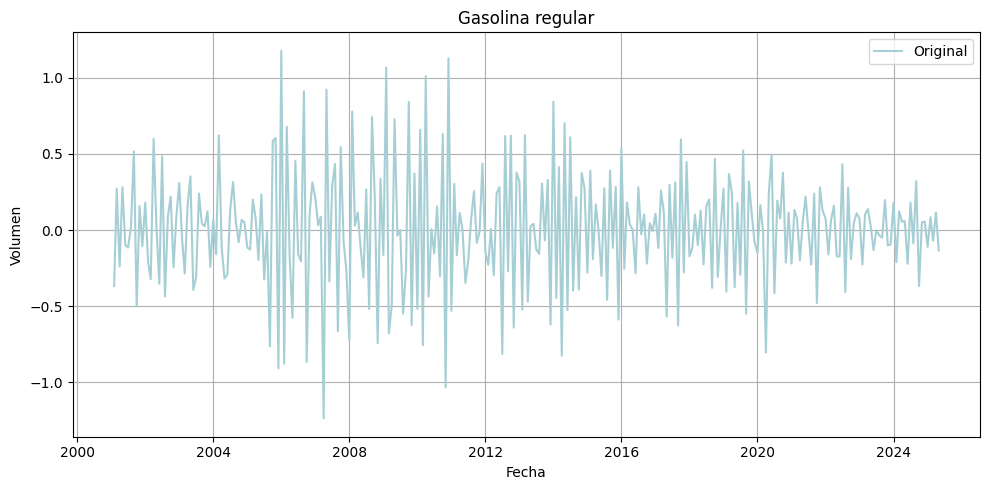

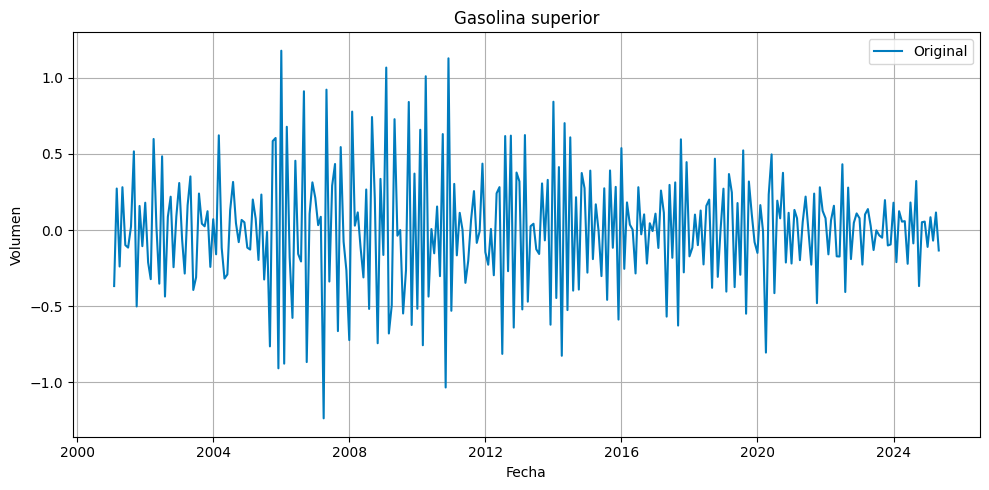

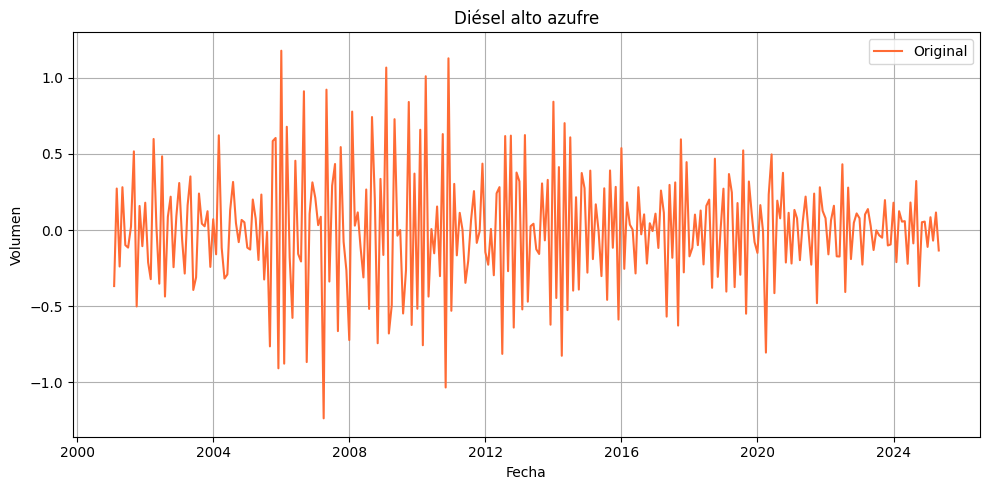

In [37]:
#media_movil_regular = regular_ts.rolling(window=12).mean()
#desv_movil_regular = regular_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(regular_ts, color="#A6CFD5", label="Original")
#plt.plot(media_movil_regular, color='red', label='Media Móvil')
#plt.plot(desv_movil_regular, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Gasolina regular")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------
#media_movil_superior = superior_ts.rolling(window=12).mean()
#desv_movil_superior = superior_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(regular_ts, color="#007CBE", label="Original")
#plt.plot(media_movil_superior, color='red', label='Media Móvil')
#plt.plot(desv_movil_superior, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------
#media_movil_diesel = diesel_ts.rolling(window=12).mean()
#desv_movil_diesel = diesel_ts.rolling(window=12).std()

plt.figure(figsize=(10, 5))
plt.plot(regular_ts, color="#FF6B35", label="Original")
#plt.plot(media_movil_diesel, color='red', label='Media Móvil')
#plt.plot(desv_movil_diesel, color='black', label='Desviación Estándar Móvil')

plt.legend(loc='best')
plt.title("Diésel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(True)
plt.tight_layout()
plt.show()


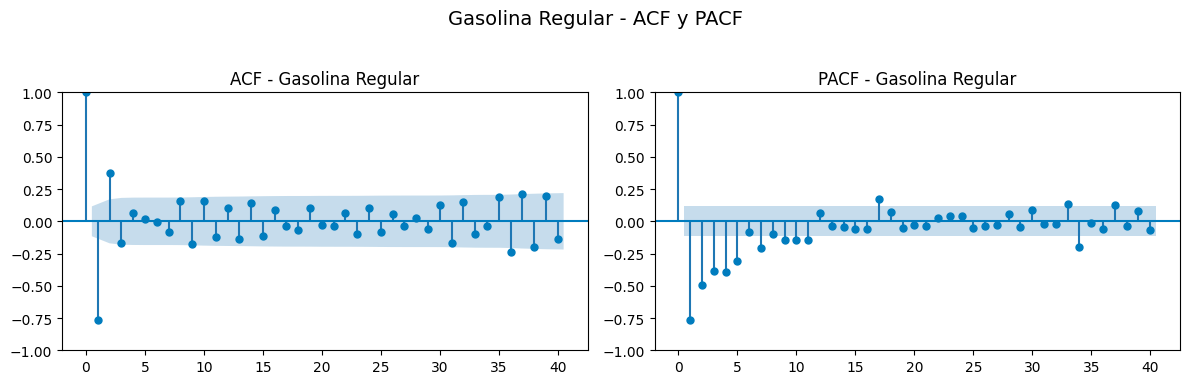

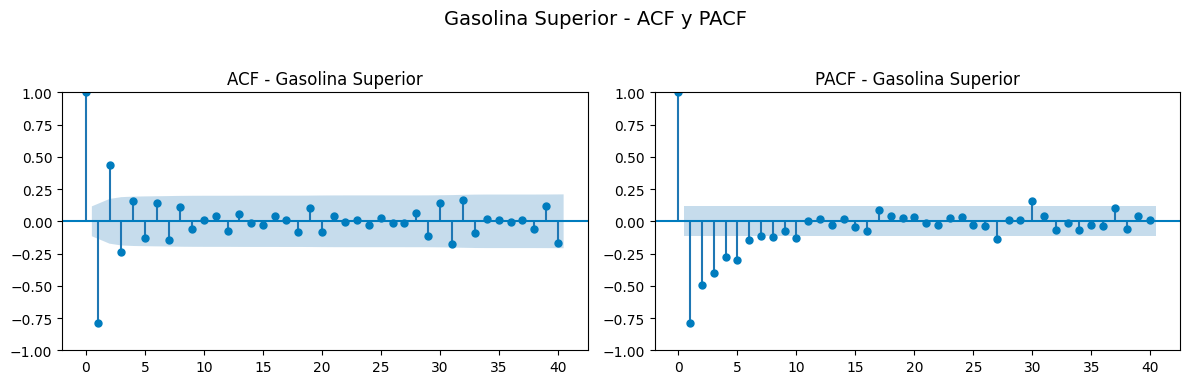

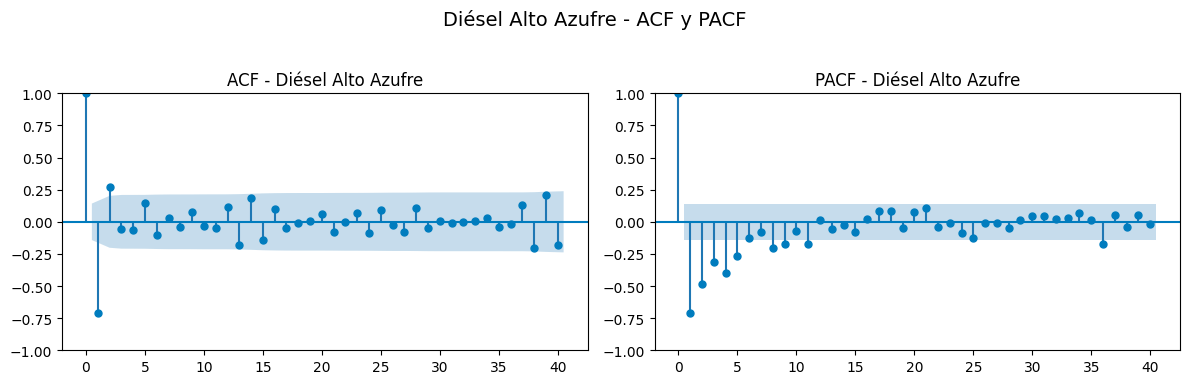

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Gasolina Regular ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.suptitle("Gasolina Regular - ACF y PACF", fontsize=14)

plot_acf(regular_ts.diff().dropna(), ax=axes[0], lags=40, color="#007CBE")
axes[0].set_title("ACF - Gasolina Regular")

plot_pacf(regular_ts.diff().dropna(), ax=axes[1], lags=40, color="#007CBE", method="ywm")
axes[1].set_title("PACF - Gasolina Regular")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Gasolina Superior ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.suptitle("Gasolina Superior - ACF y PACF", fontsize=14)

plot_acf(superior_ts.diff().dropna(), ax=axes[0], lags=40, color="#007CBE")
axes[0].set_title("ACF - Gasolina Superior")

plot_pacf(superior_ts.diff().dropna(), ax=axes[1], lags=40, color="#007CBE", method="ywm")
axes[1].set_title("PACF - Gasolina Superior")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Diésel Alto Azufre ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.suptitle("Diésel Alto Azufre - ACF y PACF", fontsize=14)

plot_acf(diesel_ts.diff().dropna(), ax=axes[0], lags=40, color="#007CBE")
axes[0].set_title("ACF - Diésel Alto Azufre")

plot_pacf(diesel_ts.diff().dropna(), ax=axes[1], lags=40, color="#007CBE", method="ywm")
axes[1].set_title("PACF - Diésel Alto Azufre")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Filtrar la serie hasta diciembre 2024
serie = regular_ts[:"2024-12"]

# 2. Dividir en entrenamiento (80%) y prueba (20%)
n = len(serie)
train_size = int(n * 0.8)
train = serie.iloc[:train_size]
test = serie.iloc[train_size:]

# 3. Entrenar modelo SARIMA (puedes ajustar los parámetros si ya los definiste)
modelo = SARIMAX(train,
                 order=(1, 1, 1),
                 seasonal_order=(0, 1, 1, 12),
                 enforce_stationarity=False,
                 enforce_invertibility=False)

modelo_fit = modelo.fit(disp=False)

# 4. Generar valores ajustados solo para evaluar el entrenamiento
fitted_values = modelo_fit.fittedvalues

# 5. Evaluar desempeño en datos de prueba
predictions_test = modelo_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

rmse = np.sqrt(mean_squared_error(test, predictions_test))
mae = mean_absolute_error(test, predictions_test)

print(f"RMSE en conjunto de prueba: {rmse:.4f}")
print(f"MAE en conjunto de prueba: {mae:.4f}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE en conjunto de prueba: 0.2470
MAE en conjunto de prueba: 0.1773


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# -----------------------
# Preparar datos
# -----------------------

# Filtrar solo hasta 2024
serie = regular_ts[:"2024-12"]

# Separar 80% entrenamiento, 20% prueba
n = len(serie)
train_size = int(n * 0.8)
train = serie.iloc[:train_size]
test = serie.iloc[train_size:]

# -----------------------
# Definir parámetros a evaluar
# -----------------------

p_values = [0, 1, 2]
q_values = [0, 1, 2]
d = 1             # Diferenciación regular
D = 1             # Diferenciación estacional
s = 24            # Estacionalidad de 24 meses
P = 0             # Puedes ajustar estos si deseas explorar variantes
Q = 1

# -----------------------
# Entrenar modelos y guardar resultados
# -----------------------

resultados = []

for p in p_values:
    for q in q_values:
        try:
            modelo = SARIMAX(train,
                             order=(p, d, q),
                             seasonal_order=(P, D, Q, s),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
            
            modelo_fit = modelo.fit(disp=False)
            
            # Predecir sobre el set de prueba
            pred = modelo_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
            
            # Calcular RMSE
            rmse = np.sqrt(mean_squared_error(test, pred))
            
            resultados.append({
                'p': p, 'd': d, 'q': q,
                'P': P, 'D': D, 'Q': Q, 's': s,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error con SARIMA({p},{d},{q})x({P},{D},{Q},{s}): {e}")

# -----------------------
# Mostrar resultados ordenados
# -----------------------

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='RMSE')
print(df_resultados)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will b

   p  d  q  P  D  Q   s      RMSE
2  0  1  2  0  1  1  24  0.255790
1  0  1  1  0  1  1  24  0.255790
5  1  1  2  0  1  1  24  0.258322
8  2  1  2  0  1  1  24  0.258804
7  2  1  1  0  1  1  24  0.259186
4  1  1  1  0  1  1  24  0.260494
3  1  1  0  0  1  1  24  0.262811
6  2  1  0  0  1  1  24  0.264174
0  0  1  0  0  1  1  24  0.424872


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


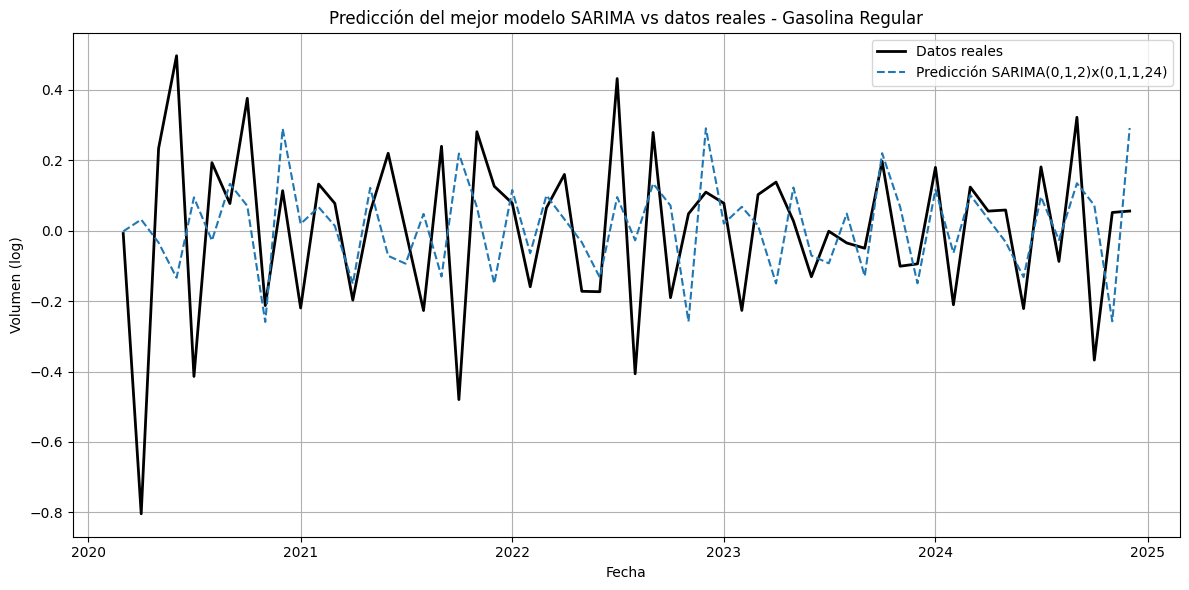

In [17]:
# Obtener el mejor modelo (el de menor RMSE)
mejor_modelo = df_resultados.iloc[0]

# Extraer parámetros del mejor modelo
p, d, q = int(mejor_modelo['p']), int(mejor_modelo['d']), int(mejor_modelo['q'])
P, D, Q, s = int(mejor_modelo['P']), int(mejor_modelo['D']), int(mejor_modelo['Q']), int(mejor_modelo['s'])

# Entrenar el modelo sobre el conjunto de entrenamiento
modelo = SARIMAX(train,
                 order=(p, d, q),
                 seasonal_order=(P, D, Q, s),
                 enforce_stationarity=False,
                 enforce_invertibility=False)

modelo_fit = modelo.fit(disp=False)

# Predecir para el conjunto de prueba
pred = modelo_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(test, label='Datos reales', color='black', linewidth=2)
plt.plot(pred, label=f"Predicción SARIMA({p},{d},{q})x({P},{D},{Q},{s})", linestyle='--', color='#1f77b4')

plt.title("Predicción del mejor modelo SARIMA vs datos reales - Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Volumen (log)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# -----------------------
# Preparar datos
# -----------------------

# Filtrar solo hasta 2024
serie = superior_ts[:"2024-12"]

# Separar 80% entrenamiento, 20% prueba
n = len(serie)
train_size = int(n * 0.8)
train = serie.iloc[:train_size]
test = serie.iloc[train_size:]

# -----------------------
# Definir parámetros a evaluar
# -----------------------

p_values = [0, 1, 2]
q_values = [0, 1, 2]
d = 1             # Diferenciación regular
D = 1             # Diferenciación estacional
s = 24            # Estacionalidad de 24 meses
P = 0             # Puedes ajustar estos si deseas explorar variantes
Q = 1

# -----------------------
# Entrenar modelos y guardar resultados
# -----------------------

resultados = []

for p in p_values:
    for q in q_values:
        try:
            modelo = SARIMAX(train,
                             order=(p, d, q),
                             seasonal_order=(P, D, Q, s),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
            
            modelo_fit = modelo.fit(disp=False)
            
            # Predecir sobre el set de prueba
            pred = modelo_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
            
            # Calcular RMSE
            rmse = np.sqrt(mean_squared_error(test, pred))
            
            resultados.append({
                'p': p, 'd': d, 'q': q,
                'P': P, 'D': D, 'Q': Q, 's': s,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error con SARIMA({p},{d},{q})x({P},{D},{Q},{s}): {e}")

# -----------------------
# Mostrar resultados ordenados
# -----------------------

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='RMSE')
print(df_resultados)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will b

   p  d  q  P  D  Q   s      RMSE
4  1  1  1  0  1  1  24  0.283244
8  2  1  2  0  1  1  24  0.285305
5  1  1  2  0  1  1  24  0.285403
1  0  1  1  0  1  1  24  0.286243
2  0  1  2  0  1  1  24  0.286684
7  2  1  1  0  1  1  24  0.288655
3  1  1  0  0  1  1  24  0.289870
6  2  1  0  0  1  1  24  0.301361
0  0  1  0  0  1  1  24  0.321570


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


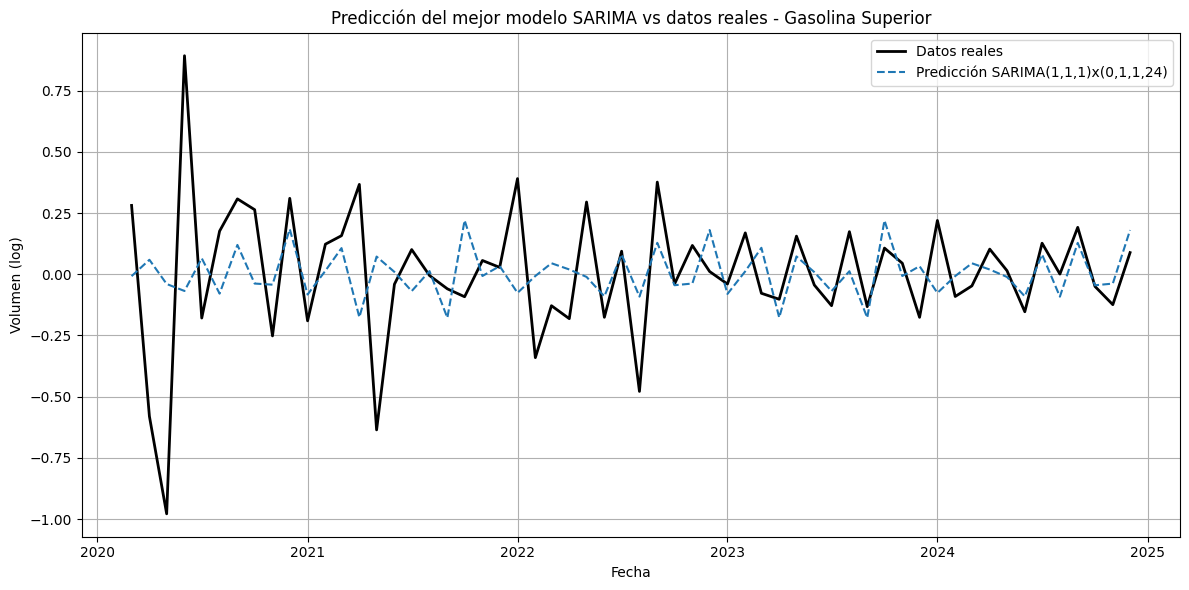

In [19]:
# Obtener el mejor modelo (el de menor RMSE)
mejor_modelo = df_resultados.iloc[0]

# Extraer parámetros del mejor modelo
p, d, q = int(mejor_modelo['p']), int(mejor_modelo['d']), int(mejor_modelo['q'])
P, D, Q, s = int(mejor_modelo['P']), int(mejor_modelo['D']), int(mejor_modelo['Q']), int(mejor_modelo['s'])

# Entrenar el modelo sobre el conjunto de entrenamiento
modelo = SARIMAX(train,
                 order=(p, d, q),
                 seasonal_order=(P, D, Q, s),
                 enforce_stationarity=False,
                 enforce_invertibility=False)

modelo_fit = modelo.fit(disp=False)

# Predecir para el conjunto de prueba
pred = modelo_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(test, label='Datos reales', color='black', linewidth=2)
plt.plot(pred, label=f"Predicción SARIMA({p},{d},{q})x({P},{D},{Q},{s})", linestyle='--', color='#1f77b4')

plt.title("Predicción del mejor modelo SARIMA vs datos reales - Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Volumen (log)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# -----------------------
# Preparar datos
# -----------------------

# Filtrar solo hasta 2016
serie = diesel_ts[:"2016-12"]

# Separar 80% entrenamiento, 20% prueba
n = len(serie)
train_size = int(n * 0.8)
train = serie.iloc[:train_size]
test = serie.iloc[train_size:]

# -----------------------
# Definir parámetros a evaluar
# -----------------------

p_values = [0, 1, 2]
q_values = [0, 1, 2]
d = 1             # Diferenciación regular
D = 1             # Diferenciación estacional
s = 48           # Estacionalidad de 24 meses
P = 0             # Puedes ajustar estos si deseas explorar variantes
Q = 1

# -----------------------
# Entrenar modelos y guardar resultados
# -----------------------

resultados = []

for p in p_values:
    for q in q_values:
        try:
            modelo = SARIMAX(train,
                             order=(p, d, q),
                             seasonal_order=(P, D, Q, s),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
            
            modelo_fit = modelo.fit(disp=False)
            
            # Predecir sobre el set de prueba
            pred = modelo_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
            
            # Calcular RMSE
            rmse = np.sqrt(mean_squared_error(test, pred))
            
            resultados.append({
                'p': p, 'd': d, 'q': q,
                'P': P, 'D': D, 'Q': Q, 's': s,
                'RMSE': rmse
            })

        except Exception as e:
            print(f"Error con SARIMA({p},{d},{q})x({P},{D},{Q},{s}): {e}")

# -----------------------
# Mostrar resultados ordenados
# -----------------------

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='RMSE')
print(df_resultados)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys([

   p  d  q  P  D  Q   s      RMSE
4  1  1  1  0  1  1  48  0.335950
2  0  1  2  0  1  1  48  0.346988
5  1  1  2  0  1  1  48  0.348332
8  2  1  2  0  1  1  48  0.348614
1  0  1  1  0  1  1  48  0.349788
7  2  1  1  0  1  1  48  0.363747
6  2  1  0  0  1  1  48  0.467505
3  1  1  0  0  1  1  48  0.561219
0  0  1  0  0  1  1  48  1.176984


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys([

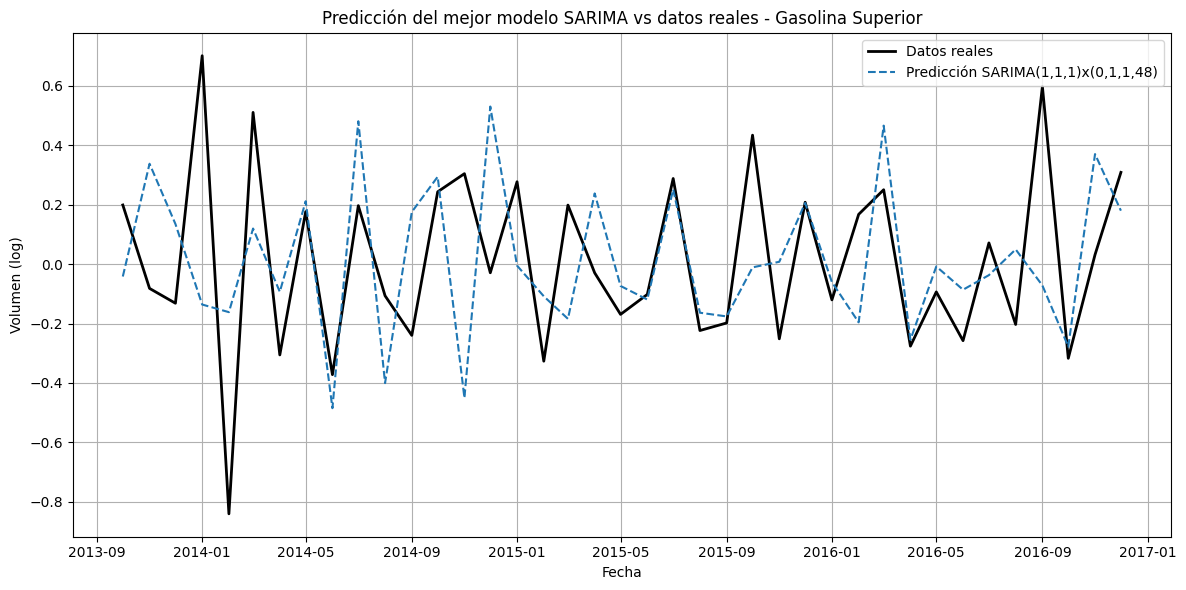

In [21]:
# Obtener el mejor modelo (el de menor RMSE)
mejor_modelo = df_resultados.iloc[0]

# Extraer parámetros del mejor modelo
p, d, q = int(mejor_modelo['p']), int(mejor_modelo['d']), int(mejor_modelo['q'])
P, D, Q, s = int(mejor_modelo['P']), int(mejor_modelo['D']), int(mejor_modelo['Q']), int(mejor_modelo['s'])

# Entrenar el modelo sobre el conjunto de entrenamiento
modelo = SARIMAX(train,
                 order=(p, d, q),
                 seasonal_order=(P, D, Q, s),
                 enforce_stationarity=False,
                 enforce_invertibility=False)

modelo_fit = modelo.fit(disp=False)

# Predecir para el conjunto de prueba
pred = modelo_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(test, label='Datos reales', color='black', linewidth=2)
plt.plot(pred, label=f"Predicción SARIMA({p},{d},{q})x({P},{D},{Q},{s})", linestyle='--', color='#1f77b4')

plt.title("Predicción del mejor modelo SARIMA vs datos reales - Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Volumen (log)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing


RMSE Prophet: 0.2449


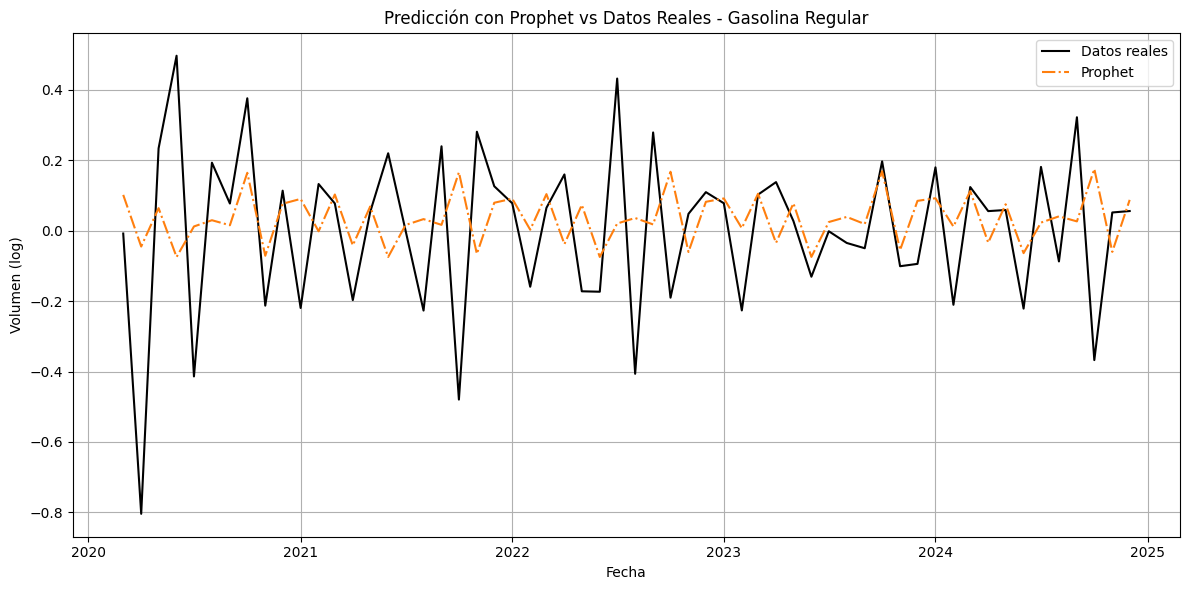

In [22]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# --- Preparar datos para Prophet hasta diciembre 2024 ---
serie = regular_ts[:"2024-12"]

df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']

# --- Separar en entrenamiento y prueba (80/20) ---
n = len(df_prophet)
train_size = int(n * 0.8)

df_train = df_prophet.iloc[:train_size]
df_test = df_prophet.iloc[train_size:]

# --- Entrenar modelo Prophet ---
modelo_prophet = Prophet(seasonality_mode='additive', yearly_seasonality=True)
modelo_prophet.fit(df_train)

# --- Predecir sobre las fechas de prueba ---
df_future = df_test[['ds']].copy()
forecast = modelo_prophet.predict(df_future)
pred_prophet = forecast[['ds', 'yhat']].set_index('ds')

# --- Alinear test real y predicciones Prophet ---
test_series = df_test.set_index('ds')['y']
y_pred = pred_prophet['yhat'].reindex(test_series.index)

# --- Calcular RMSE Prophet ---
mse_prophet = mean_squared_error(test_series, y_pred)
rmse_prophet = np.sqrt(mse_prophet)

print(f"RMSE Prophet: {rmse_prophet:.4f}")

# --- Graficar comparación Prophet vs datos reales ---
plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Datos reales', color='black')
plt.plot(y_pred, label='Prophet', linestyle='-.', color='#ff7f0e')

plt.title("Predicción con Prophet vs Datos Reales - Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Volumen (log)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


20:08:53 - cmdstanpy - INFO - Chain [1] start processing


20:08:53 - cmdstanpy - INFO - Chain [1] done processing


RMSE Prophet: 0.2855


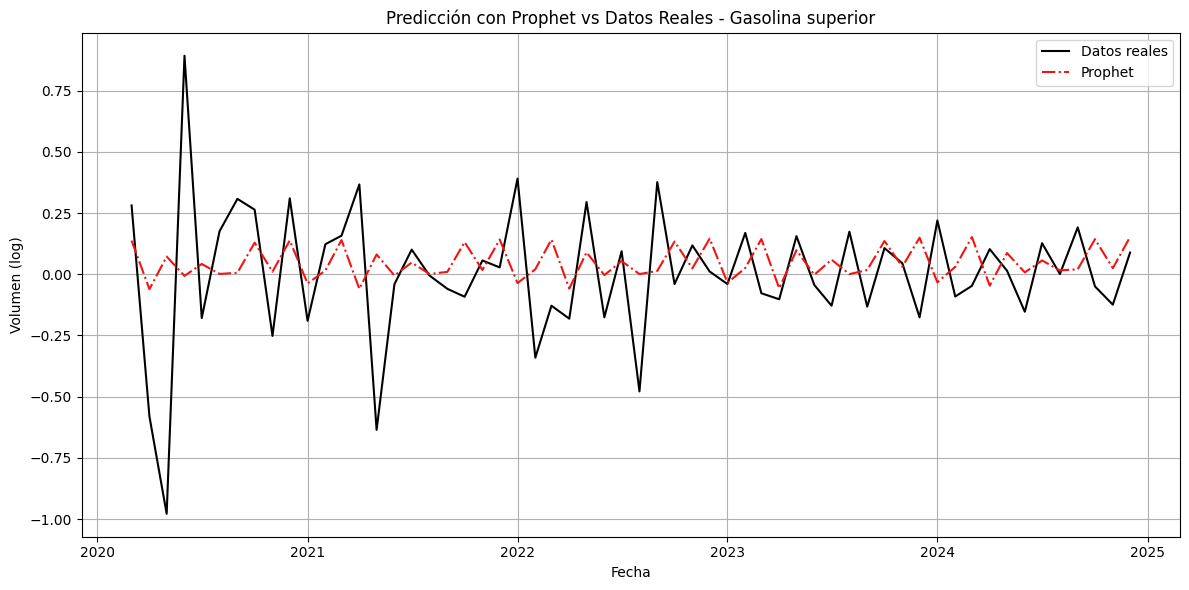

In [23]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# --- Preparar datos para Prophet hasta diciembre 2024 ---
serie = superior_ts[:"2024-12"]

df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']

# --- Separar en entrenamiento y prueba (80/20) ---
n = len(df_prophet)
train_size = int(n * 0.8)

df_train = df_prophet.iloc[:train_size]
df_test = df_prophet.iloc[train_size:]

# --- Entrenar modelo Prophet ---
modelo_prophet = Prophet(seasonality_mode='additive', yearly_seasonality=True)
modelo_prophet.fit(df_train)

# --- Predecir sobre las fechas de prueba ---
df_future = df_test[['ds']].copy()
forecast = modelo_prophet.predict(df_future)
pred_prophet = forecast[['ds', 'yhat']].set_index('ds')

# --- Alinear test real y predicciones Prophet ---
test_series = df_test.set_index('ds')['y']
y_pred = pred_prophet['yhat'].reindex(test_series.index)

# --- Calcular RMSE Prophet ---
mse_prophet = mean_squared_error(test_series, y_pred)
rmse_prophet = np.sqrt(mse_prophet)

print(f"RMSE Prophet: {rmse_prophet:.4f}")

# --- Graficar comparación Prophet vs datos reales ---
plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Datos reales', color='black')
plt.plot(y_pred, label='Prophet', linestyle='-.', color="#F31313")

plt.title("Predicción con Prophet vs Datos Reales - Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Volumen (log)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


20:08:54 - cmdstanpy - INFO - Chain [1] start processing
20:08:54 - cmdstanpy - INFO - Chain [1] done processing


RMSE Prophet: 0.2889


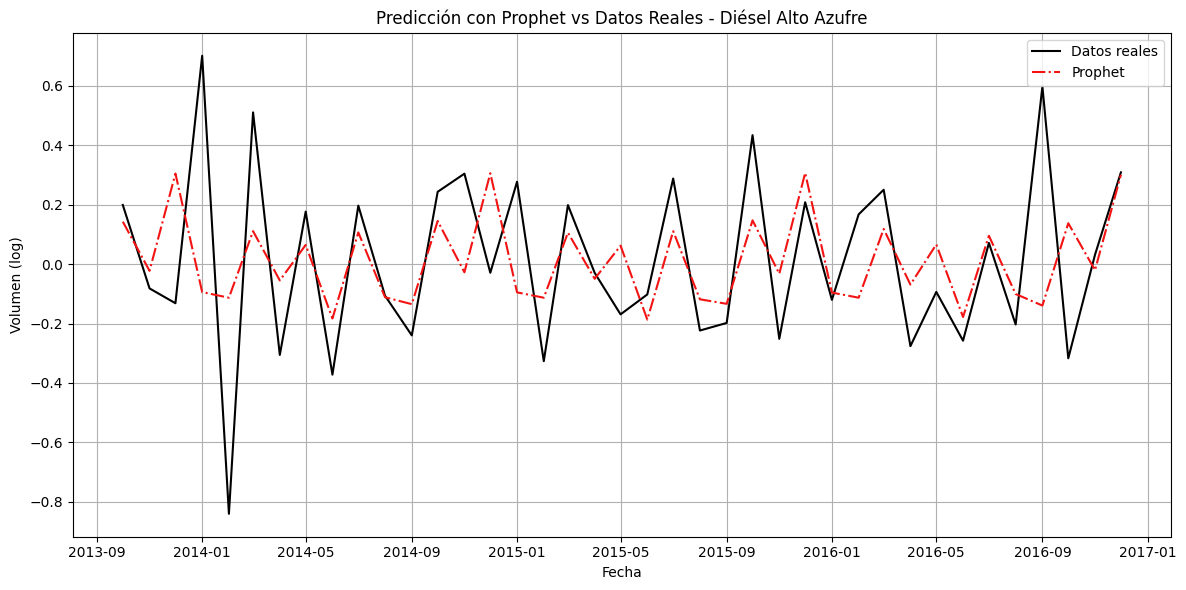

In [24]:


# --- Preparar datos para Prophet hasta diciembre 2024 ---
serie = diesel_ts[:"2016-12"]

df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']

# --- Separar en entrenamiento y prueba (80/20) ---
n = len(df_prophet)
train_size = int(n * 0.8)

df_train = df_prophet.iloc[:train_size]
df_test = df_prophet.iloc[train_size:]

# --- Entrenar modelo Prophet ---
modelo_prophet = Prophet(seasonality_mode='additive', yearly_seasonality=True)
modelo_prophet.fit(df_train)

# --- Predecir sobre las fechas de prueba ---
df_future = df_test[['ds']].copy()
forecast = modelo_prophet.predict(df_future)
pred_prophet = forecast[['ds', 'yhat']].set_index('ds')

# --- Alinear test real y predicciones Prophet ---
test_series = df_test.set_index('ds')['y']
y_pred = pred_prophet['yhat'].reindex(test_series.index)

# --- Calcular RMSE Prophet ---
mse_prophet = mean_squared_error(test_series, y_pred)
rmse_prophet = np.sqrt(mse_prophet)

print(f"RMSE Prophet: {rmse_prophet:.4f}")

# --- Graficar comparación Prophet vs datos reales ---
plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Datos reales', color='black')
plt.plot(y_pred, label='Prophet', linestyle='-.', color="#F31313")

plt.title("Predicción con Prophet vs Datos Reales - Diésel Alto Azufre")
plt.xlabel("Fecha")
plt.ylabel("Volumen (log)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
def evaluar_sarima(serie, fechas_entrenamiento, fechas_prediccion, order, seasonal_order, titulo):
    # Separar datos en entrenamiento y prueba
    serie_train = serie[fechas_entrenamiento[0]:fechas_entrenamiento[1]]
    serie_test = serie[fechas_prediccion[0]:fechas_prediccion[1]]
    
    # Entrenar el modelo
    modelo = SARIMAX(serie_train,
                     order=order,
                     seasonal_order=seasonal_order,
                     enforce_stationarity=False,
                     enforce_invertibility=False)
    modelo_fit = modelo.fit(disp=False)
    
    # Predecir sobre los últimos 3 años
    pred = modelo_fit.predict(start=serie_test.index[0], end=serie_test.index[-1], typ='levels')
    
    # Calcular RMSE
    rmse = np.sqrt(mean_squared_error(serie_test, pred))
    
    # Graficar resultados
    plt.figure(figsize=(10, 5))
    plt.plot(serie_test, label='Datos reales', color='black')
    plt.plot(pred, label='Predicción SARIMA', linestyle='--', color='orange')
    plt.title(f'Predicción últimos 3 años - {titulo}\nRMSE: {rmse:.4f}')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen (log)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return rmse


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


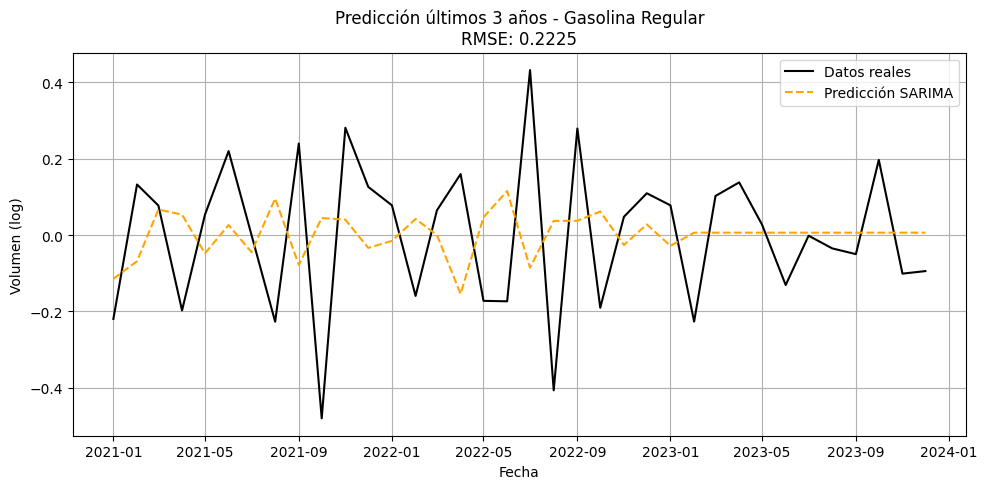

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


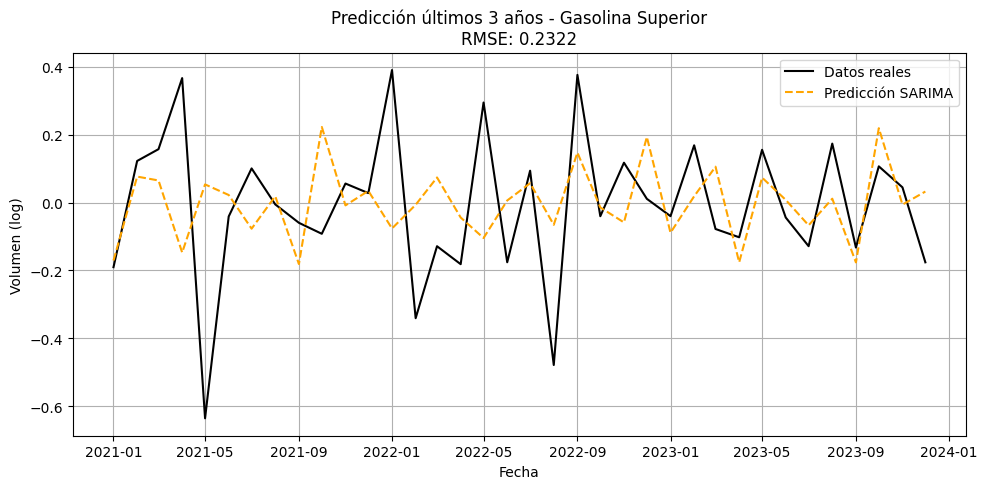

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys([

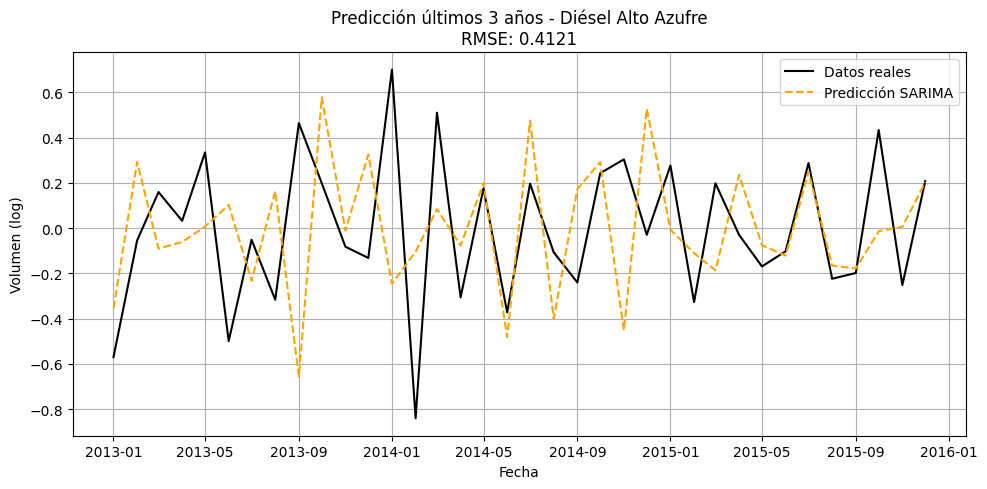

In [26]:
# Gasolina Regular: predicción 2021–2023
rmse_regular = evaluar_sarima(
    regular_ts,
    ("2001-01", "2020-12"),
    ("2021-01", "2023-12"),
    order=(0, 1, 2),
    seasonal_order=(0, 0, 1, 24),
    titulo="Gasolina Regular"
)

# Gasolina Superior: predicción 2021–2023
rmse_superior = evaluar_sarima(
    superior_ts,
    ("2001-01", "2020-12"),
    ("2021-01", "2023-12"),
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 24),
    titulo="Gasolina Superior"
)

# Diésel Alto Azufre: predicción 2013–2015
rmse_diesel = evaluar_sarima(
    diesel_ts,
    ("2001-01", "2012-12"),
    ("2013-01", "2015-12"),
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 48),
    titulo="Diésel Alto Azufre"
)


In [27]:
#PREDICCIONES HASTA 2025
importaciones = pd.read_excel("estadisticas 2025.xlsx", sheet_name="Hoja1")
importaciones = importaciones[["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]]
importaciones["Fecha"] = pd.to_datetime(importaciones["Fecha"])
importaciones.set_index("Fecha", inplace=True)

In [33]:
regular_ts = importaciones["Gasolina regular"]
superior_ts = importaciones["Gasolina superior"]
#diesel_ts = importaciones["Diesel alto azufre"] Se excluye porque no hay datos de 2025

In [34]:
regular_ts = np.log(regular_ts).diff().dropna()
superior_ts = np.log(superior_ts).diff().dropna()

In [35]:
def predecir_y_evaluar_2024_2025(serie, order, seasonal_order, titulo, fecha_entrenamiento_final="2023-12", fecha_prediccion_inicio="2024-01", fecha_real_final="2025-05"):
    # Separar datos
    serie_train = serie[:fecha_entrenamiento_final]
    serie_pred = serie[fecha_prediccion_inicio:fecha_real_final]
    
    # Entrenar modelo SARIMA
    modelo = SARIMAX(serie_train,
                     order=order,
                     seasonal_order=seasonal_order,
                     enforce_stationarity=False,
                     enforce_invertibility=False)
    modelo_fit = modelo.fit(disp=False)
    
    # Predecir para todo 2024 y hasta mayo 2025
    pred = modelo_fit.predict(start=serie_pred.index[0], end=serie_pred.index[-1], typ='levels')
    
    # Calcular RMSE solo para los datos ya disponibles (enero a mayo 2025)
    datos_reales = serie["2025-01":"2025-05"]
    pred_2025 = pred["2025-01":"2025-05"]
    rmse = np.sqrt(mean_squared_error(datos_reales, pred_2025))
    
    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(serie_pred, label='Datos reales (2024–mayo 2025)', color='black')
    plt.plot(pred, label='Predicción SARIMA', linestyle='--', color='orange')
    plt.axvline(pd.to_datetime("2025-01-01"), color='gray', linestyle=':', label="Inicio 2025")
    plt.title(f"Predicción 2024–2025 vs Realidad - {titulo}\nRMSE 2025: {rmse:.4f}")
    plt.xlabel("Fecha")
    plt.ylabel("Volumen (log)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return rmse


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


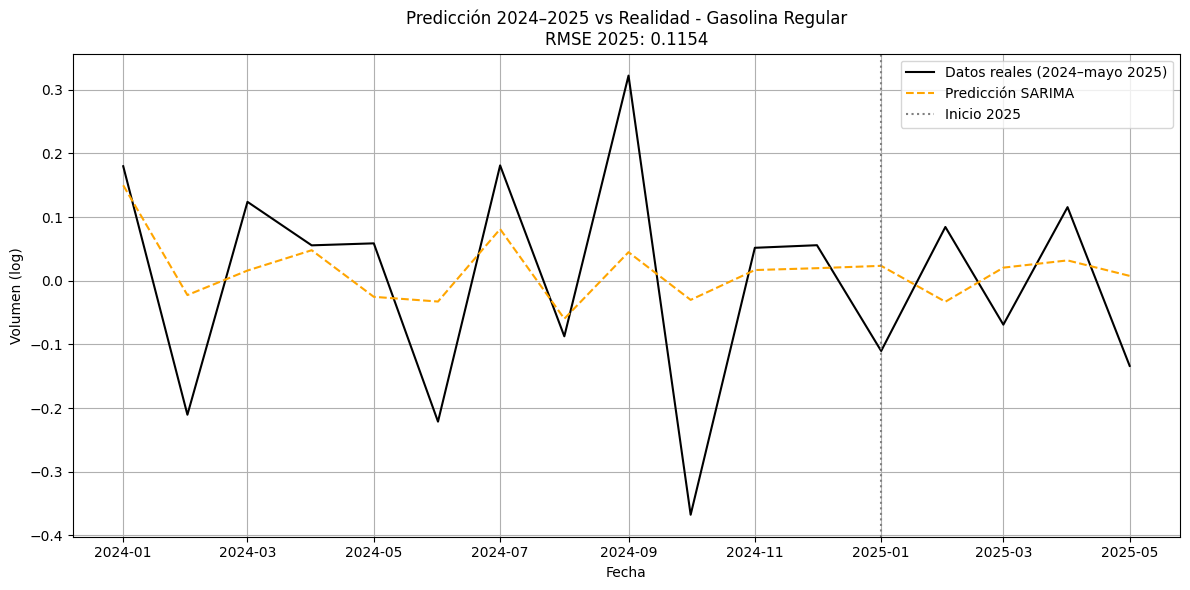

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


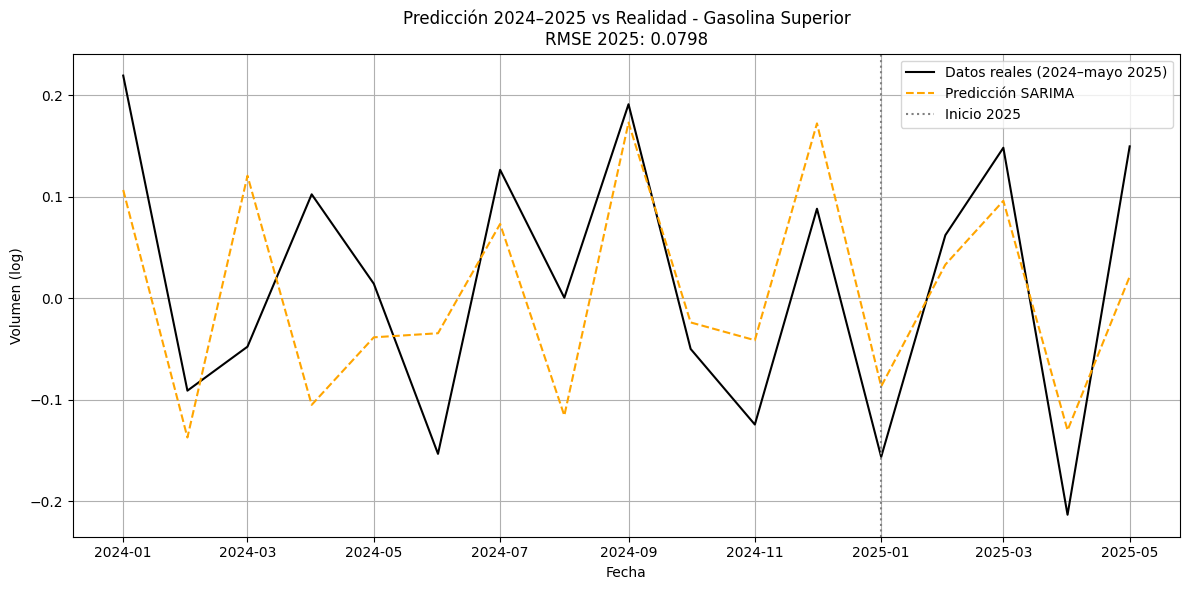

In [36]:
# Gasolina Regular
rmse_reg_2025 = predecir_y_evaluar_2024_2025(
    regular_ts,
    order=(0, 1, 2),
    seasonal_order=(0, 0, 1, 24),
    titulo="Gasolina Regular"
)

# Gasolina Superior
rmse_sup_2025 = predecir_y_evaluar_2024_2025(
    superior_ts,
    order=(1, 1, 1),
    seasonal_order=(0, 1, 1, 24),
    titulo="Gasolina Superior"
)
